# Task #4 Terrorism EDA by Shubham Wankar

## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import STOPWORDS, WordCloud

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Reading and Examining the data

In [3]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding="ISO-8859-1")

C:\Users\shubh\AppData\Local\Temp\ipykernel_15212\1841494204.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding="ISO-8859-1")


In [4]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [5]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

In [6]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [7]:
# Function to check for null values
def check_pct_null_data(data):
    total_num_rows = len(data)
    null_data = data.isnull().sum()
    pct_null_data = 100*(null_data / total_num_rows)
    pct_null_data = pct_null_data[pct_null_data > 0]
    pct_null_data = pct_null_data.sort_values(ascending=False)
    return pct_null_data

In [8]:
# Checking % of null values
pct_null_data = check_pct_null_data(data)
pct_null_data

gsubname3             99.988992
weapsubtype4          99.961473
weapsubtype4_txt      99.961473
weaptype4             99.959822
weaptype4_txt         99.959822
claimmode3            99.926799
claimmode3_txt        99.926799
gsubname2             99.911938
claim3                99.824978
guncertain3           99.823877
gname3                99.821675
divert                99.821675
attacktype3           99.764435
attacktype3_txt       99.764435
ransomnote            99.717102
ransompaidus          99.696187
ransomamtus           99.690133
claimmode2            99.660963
claimmode2_txt        99.660963
ransompaid            99.574002
corp3                 99.435305
targsubtype3          99.396228
targsubtype3_txt      99.396228
natlty3_txt           99.368708
natlty3               99.368708
target3               99.353298
targtype3             99.352747
targtype3_txt         99.352747
ransomamt             99.256980
weapsubtype3_txt      99.068198
weapsubtype3          99.068198
weaptype

## Data Cleaning

#### Dealing with duplicate and null values

In [9]:
# Dropping data with more than 50% missing values
cols_to_drop = pct_null_data[pct_null_data>50].index.values.tolist()
data = data.drop(cols_to_drop, axis=1)

In [10]:
# Checking missing value columns data types
pct_null_data = check_pct_null_data(data)
null_cols = pct_null_data.index.values.tolist()
data[null_cols].dtypes

nperps              float64
nperpcap            float64
nwoundte            float64
weapdetail           object
nkillter            float64
scite1               object
summary              object
claimed             float64
nwoundus            float64
nkillus             float64
corp1                object
weapsubtype1        float64
weapsubtype1_txt     object
nwound              float64
targsubtype1_txt     object
targsubtype1        float64
nkill               float64
longitude           float64
latitude            float64
natlty1             float64
natlty1_txt          object
target1              object
city                 object
provstate            object
guncertain1         float64
ishostkid           float64
specificity         float64
multiple            float64
doubtterr           float64
dtype: object

In [11]:
# Creating a function for fill null values
def fill_null(data, cols):
    df = data.copy()
    for col in cols:
        if col == 'summary':
            df[col] = df[col].fillna("NotAvailable")
        if df[col].dtype == 'object':
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)
        else:
            median = df[col].median()
            df[col] = df[col].fillna(median) 
    return df

In [12]:
# Filling null values in data
data = fill_null(data, null_cols)

In [13]:
# Checking null values
check_pct_null_data(data)

Series([], dtype: float64)

In [14]:
# Checking duplicate columns
dup_cols = []
cols = data.columns.tolist()
for i in range(len(cols)):
    if 'txt' in cols[i]:
        dup_cols.append((cols[i-1], cols[i]))
dup_cols

[('country', 'country_txt'),
 ('region', 'region_txt'),
 ('attacktype1', 'attacktype1_txt'),
 ('targtype1', 'targtype1_txt'),
 ('targsubtype1', 'targsubtype1_txt'),
 ('natlty1', 'natlty1_txt'),
 ('weaptype1', 'weaptype1_txt'),
 ('weapsubtype1', 'weapsubtype1_txt')]

In [15]:
# Creating a function to remove the numerical reference column
def del_dup_cols(data, dup_cols):
    df = data.copy()
    for i in dup_cols:
        df = df.drop(i[0], axis=1)
    return df

In [16]:
# Removing numerical reference columns
data = del_dup_cols(data, dup_cols)

#### Renaming columns

In [18]:
data = data.rename(columns={'eventid': "Event_ID", 
            "iyear": "Year", 
             "imonth": "Month", "iday": "Day", 
             "country_txt": "Country", 
             "region_txt": "Region",
             "provstate": "Sub_National_Region",
            "city": "City", 
             "latitude": "Latitude",
            "longitude": "Longitude", 
             "specificity": "Specificity",
            "vicinity": "Vicinity", 
             'doubtterr': "Doubter",
            "multiple": "Multiple", 
             "success": "Success",
            "suicide": 'Suicide', 
             "attacktype1_txt": "Attack_Type",
            "targtype1_txt": "Target_Type", 
             'targsubtype1_txt': "Target_Sub_Type",
             'target1': "Primary_Target",
             'natlty1_txt': "Target_Nationality",
             'gname': "Terrorist_Group",
             'nperps': "Num_Terrorists",
             "weaptype1_txt": "Weapon_Type",
             'weapsubtype1_txt': "Weapon_Sub_Type",
             'nkill': "Deaths",
             'nkillus': "Deaths_USA",
             'nkillter': "Terrorist_Deaths",
             'nwound': "Wounded",
             'nwoundus': "Wounded_USA",
             'nwoundte': "Terrorists_Wounded",
            'guncertain1': "Gun_Certainity",
            'weapdetail': "Weapon_Detail",
            'corp1': "Targeted_Corporation",
            'claimed': "Claimed",
            'summary': "Summary"
            })

In [19]:
# Dropping Unrequired columns
cols_to_drop = ['crit1', 'crit2', 'crit3', 
                'Doubter', 'Multiple','Vicinity', 
                'scite1', 'dbsource', 'INT_LOG', 
                'INT_IDEO', 'INT_MISC', 'INT_ANY', 
                'property', 'nperpcap']
data = data.drop(cols_to_drop, axis=1)

## Data Visualization

#### WordCloud of the Summary of All Terrorist Attacks

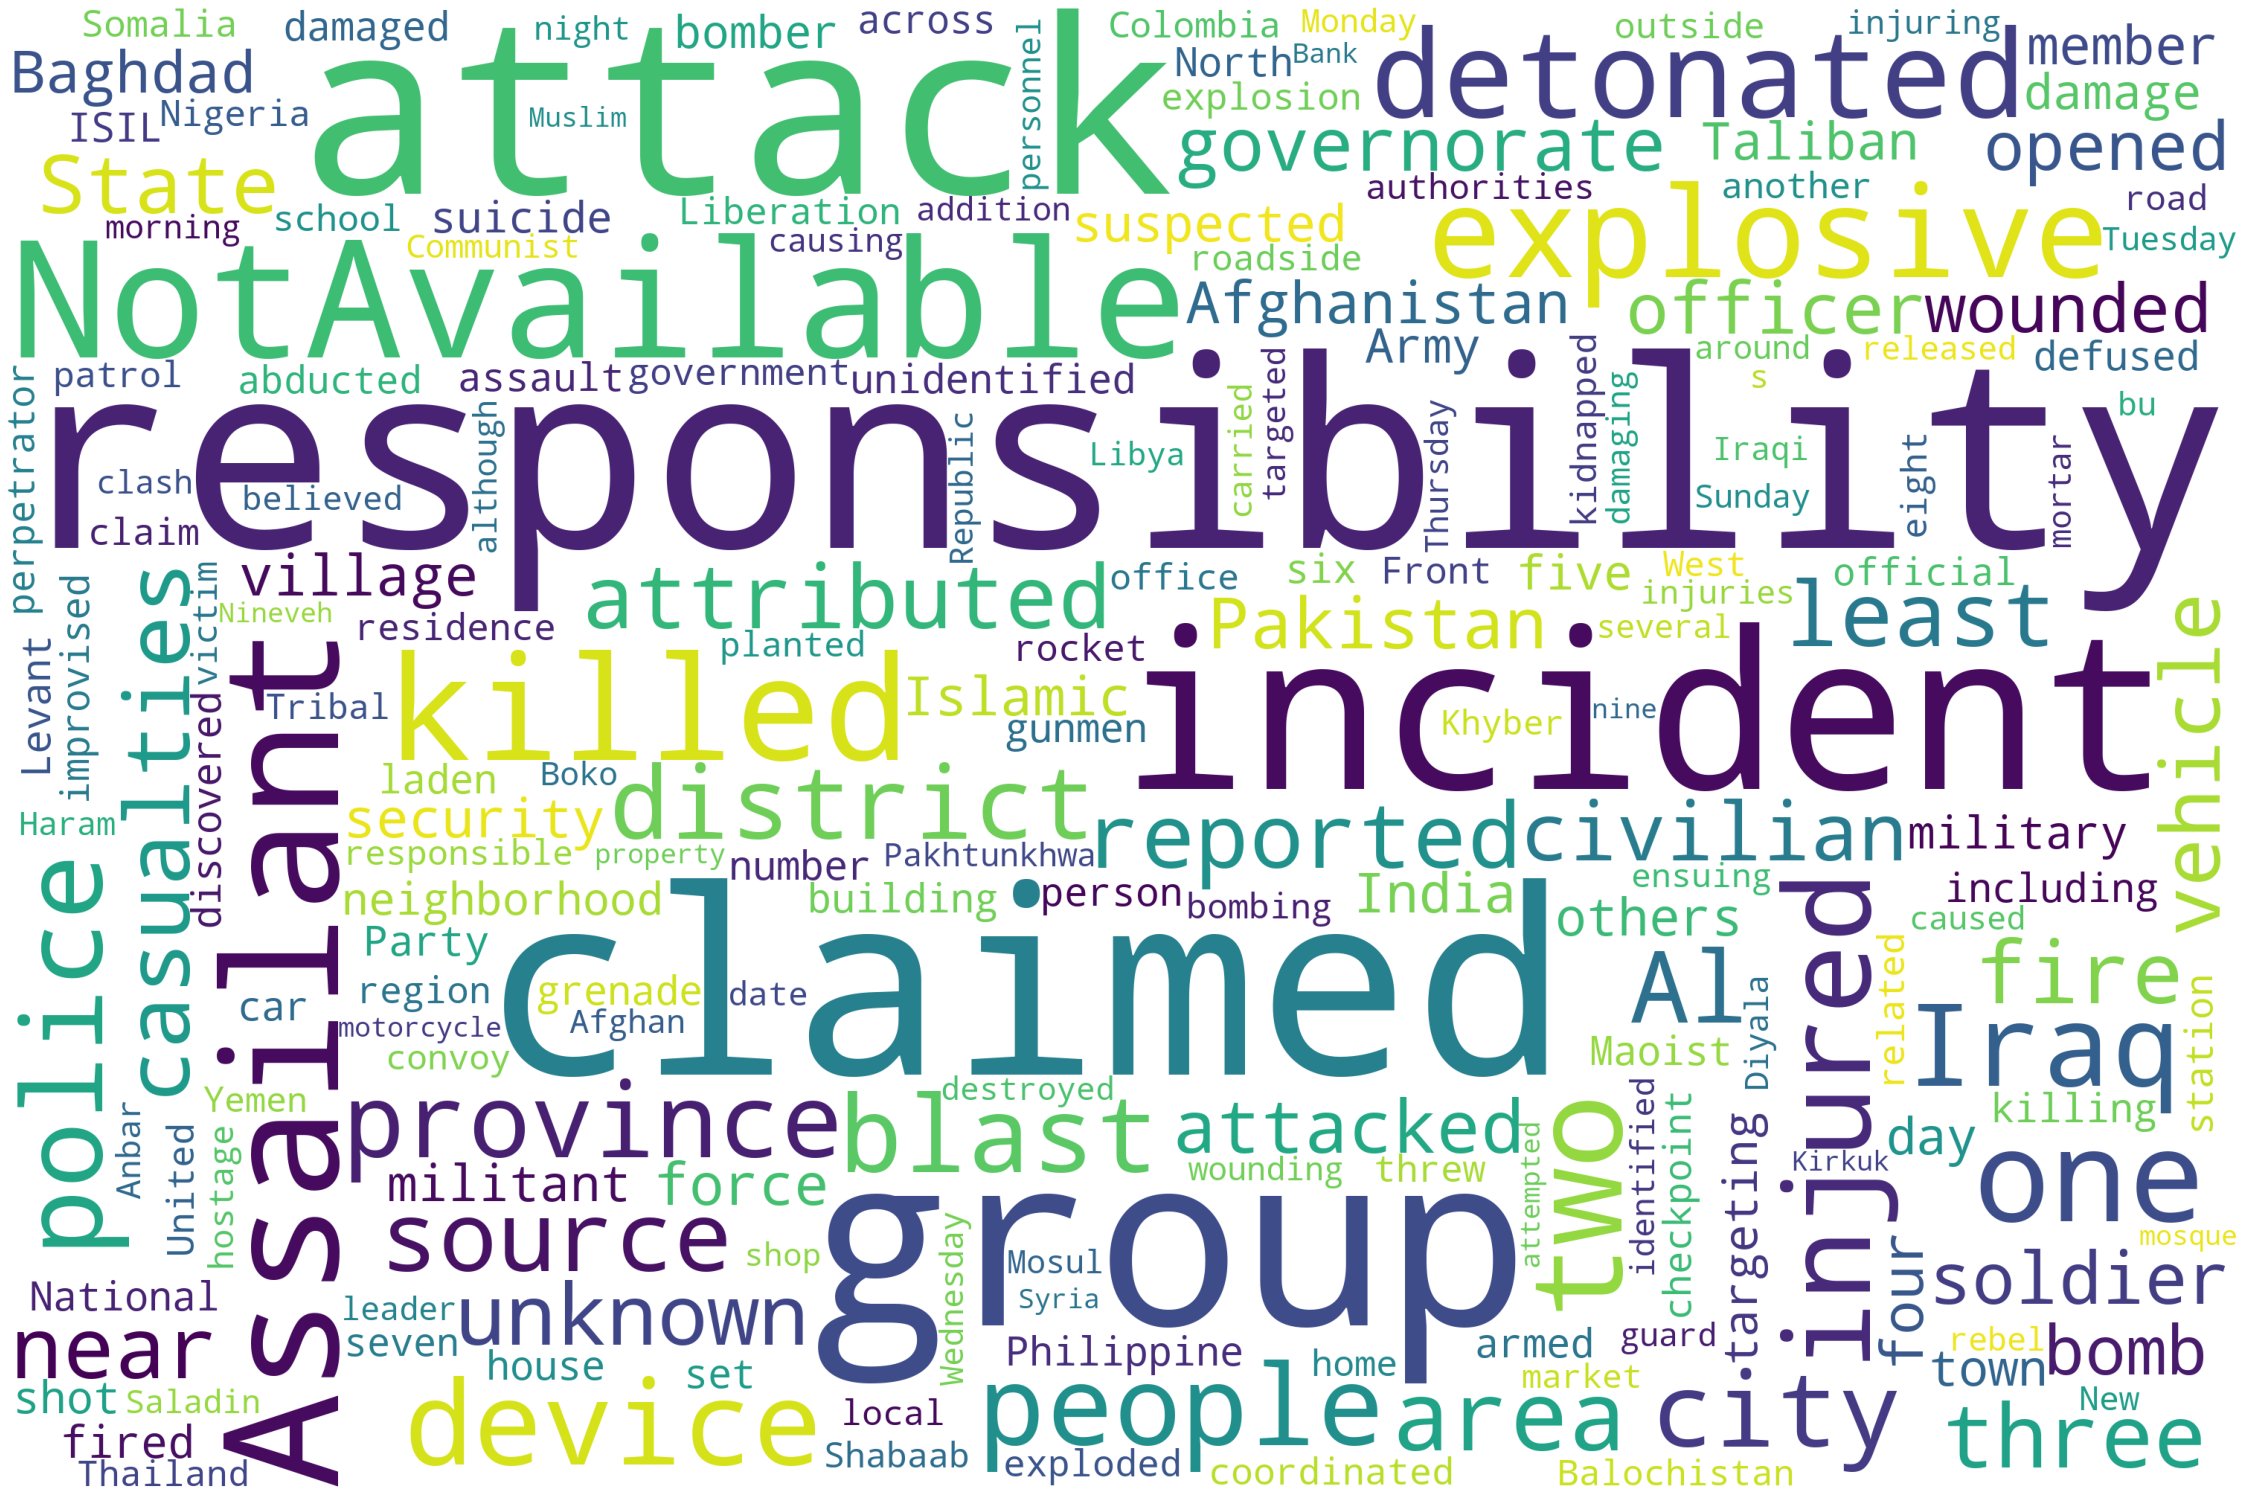

In [20]:
summary = data['Summary'].values.tolist()
summary = " ".join(summary)
wordcloud = WordCloud(width=3000, height=2000, random_state=1,
                     background_color='white', collocations=False,
                     stopwords=STOPWORDS).generate(summary)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### WordCloud of Weapon Detail used by Terrorists

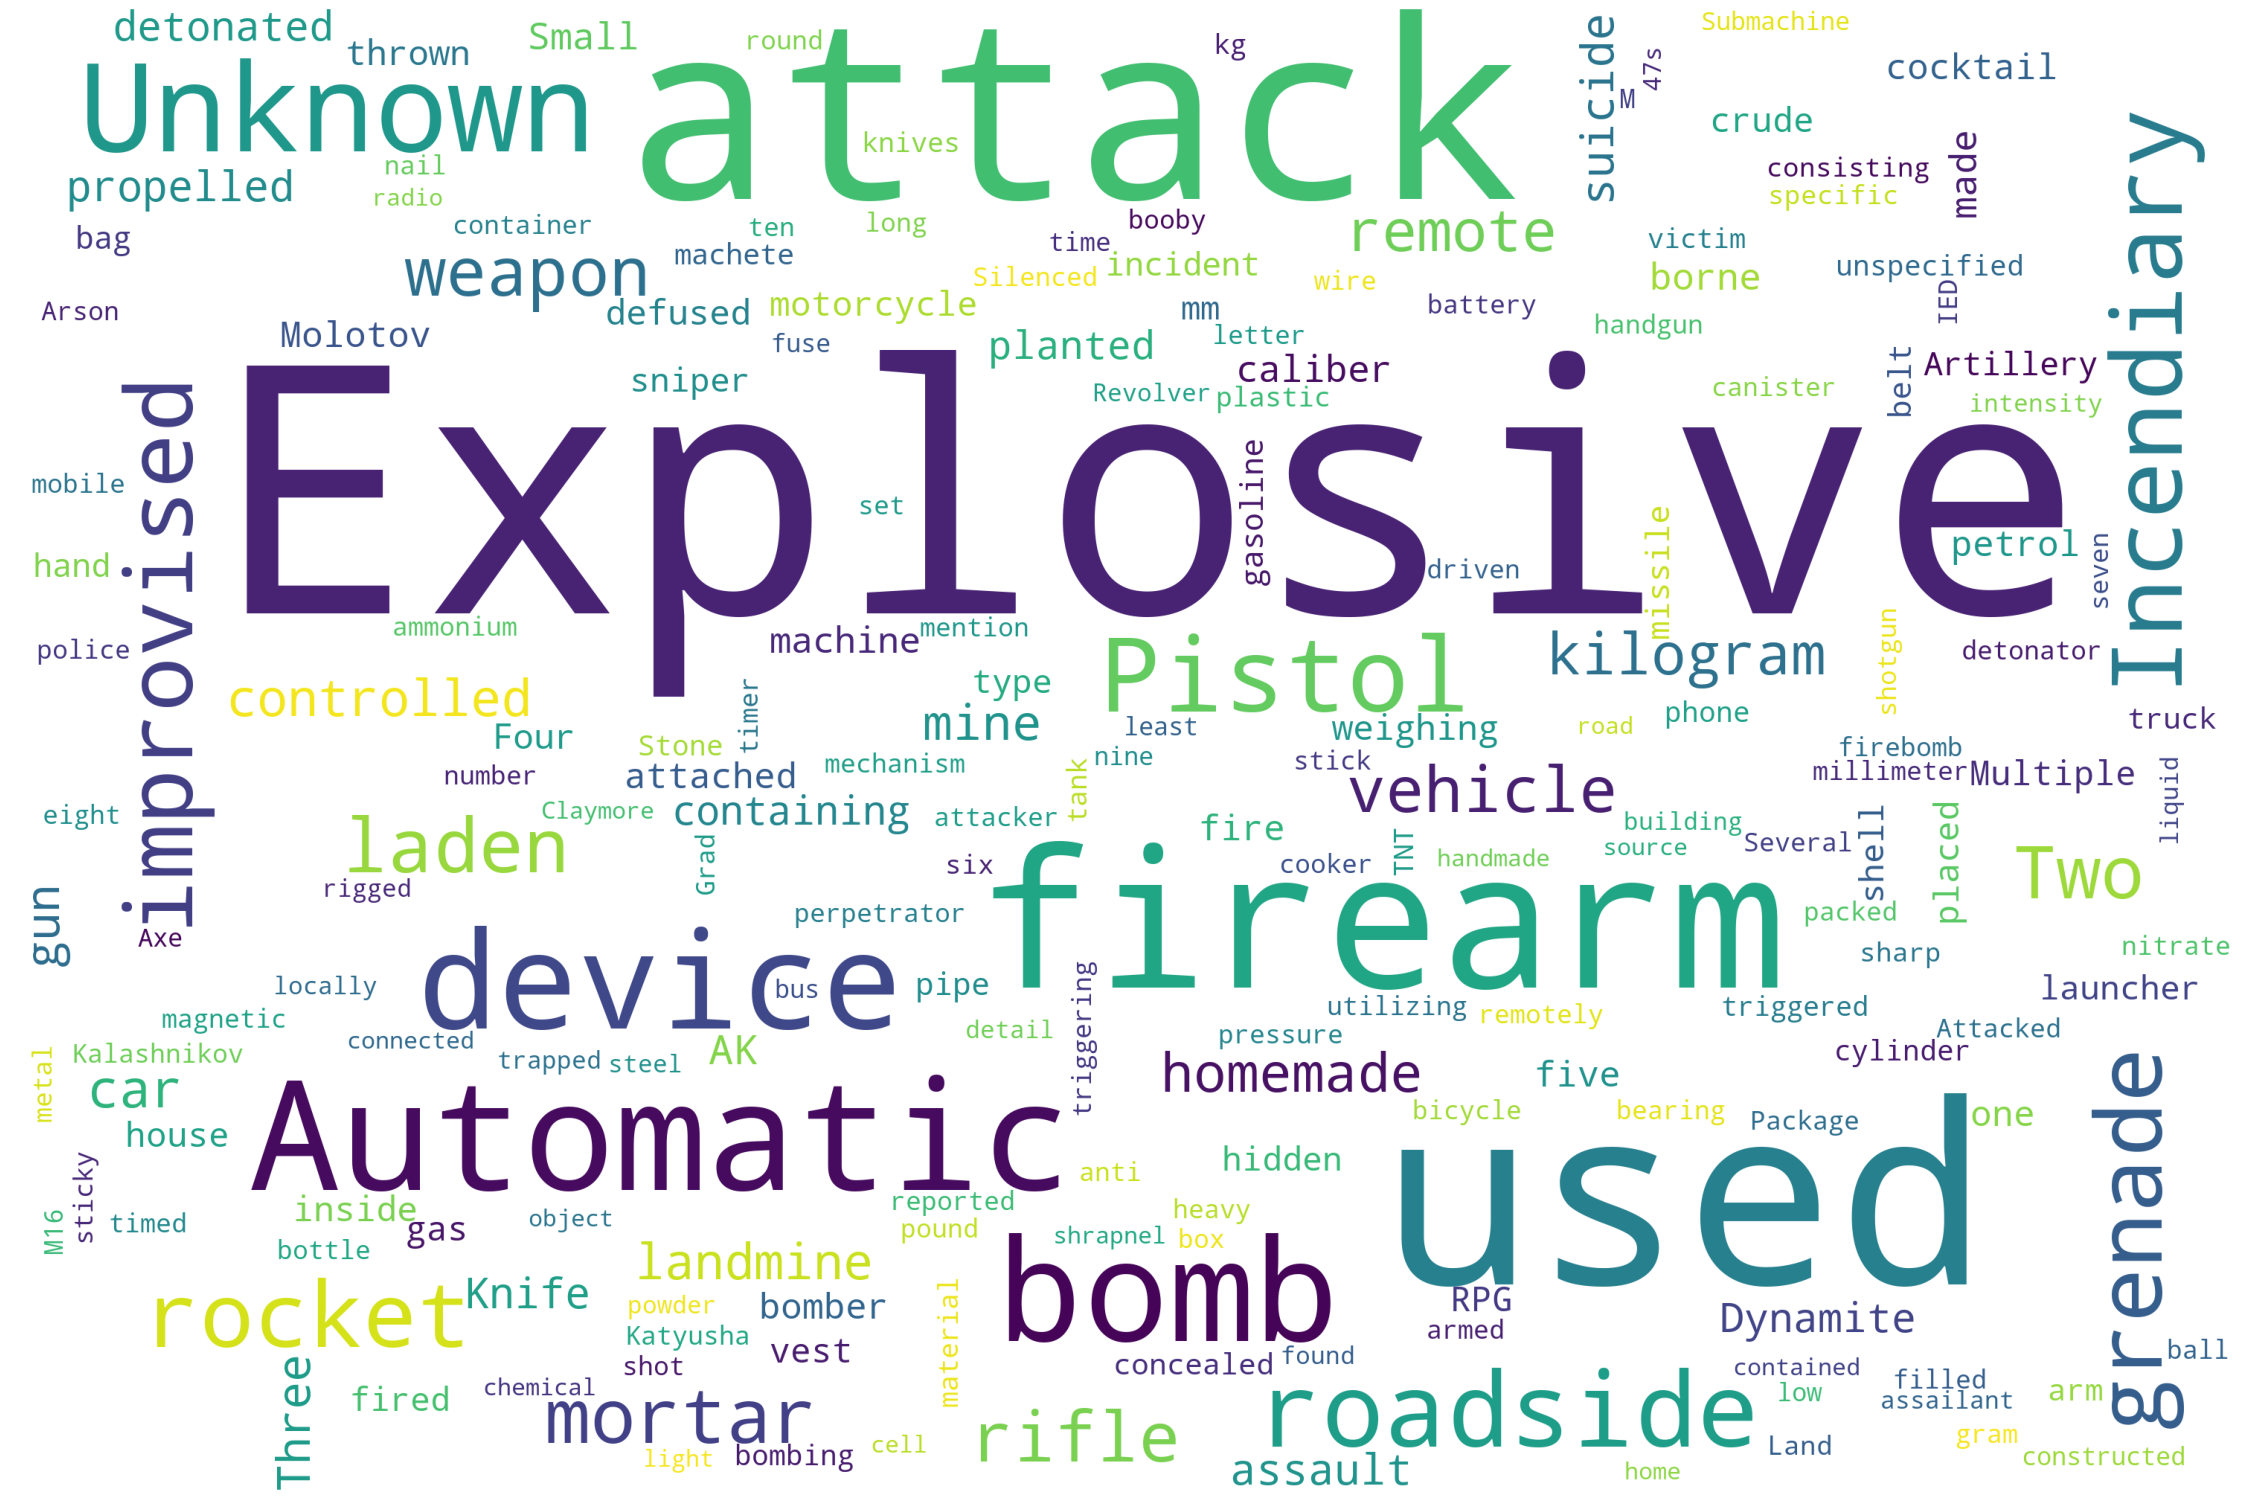

In [21]:
weapons_used = data['Weapon_Detail'].values.tolist()
weapons_used = " ".join(weapons_used)
wordcloud = WordCloud(width=3000, height=2000, random_state=1,
                     background_color='white', collocations=False,
                     stopwords=STOPWORDS).generate(weapons_used)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Exporting the cleaned file

In [22]:
data.to_csv('terrorism_data_cleaned.csv')